# 20180810 Trabajo en Clase

La siguiente es una librería en C++ que he ido desarrollando para apoyar mi trabajo diario. Es open source y pueden encontrar el código en https://github.com/adiaz-efaa/derivative-valuation-engine.git. El proceso de compilación puede ser desafiante así que puedo entregarles versiones compiladas para Windows y/o Mac si lo desean.

In [1]:
from finrisk import QC_Financial_3 as Qcf

El código que sigue es para replicar la siguiente tabla:

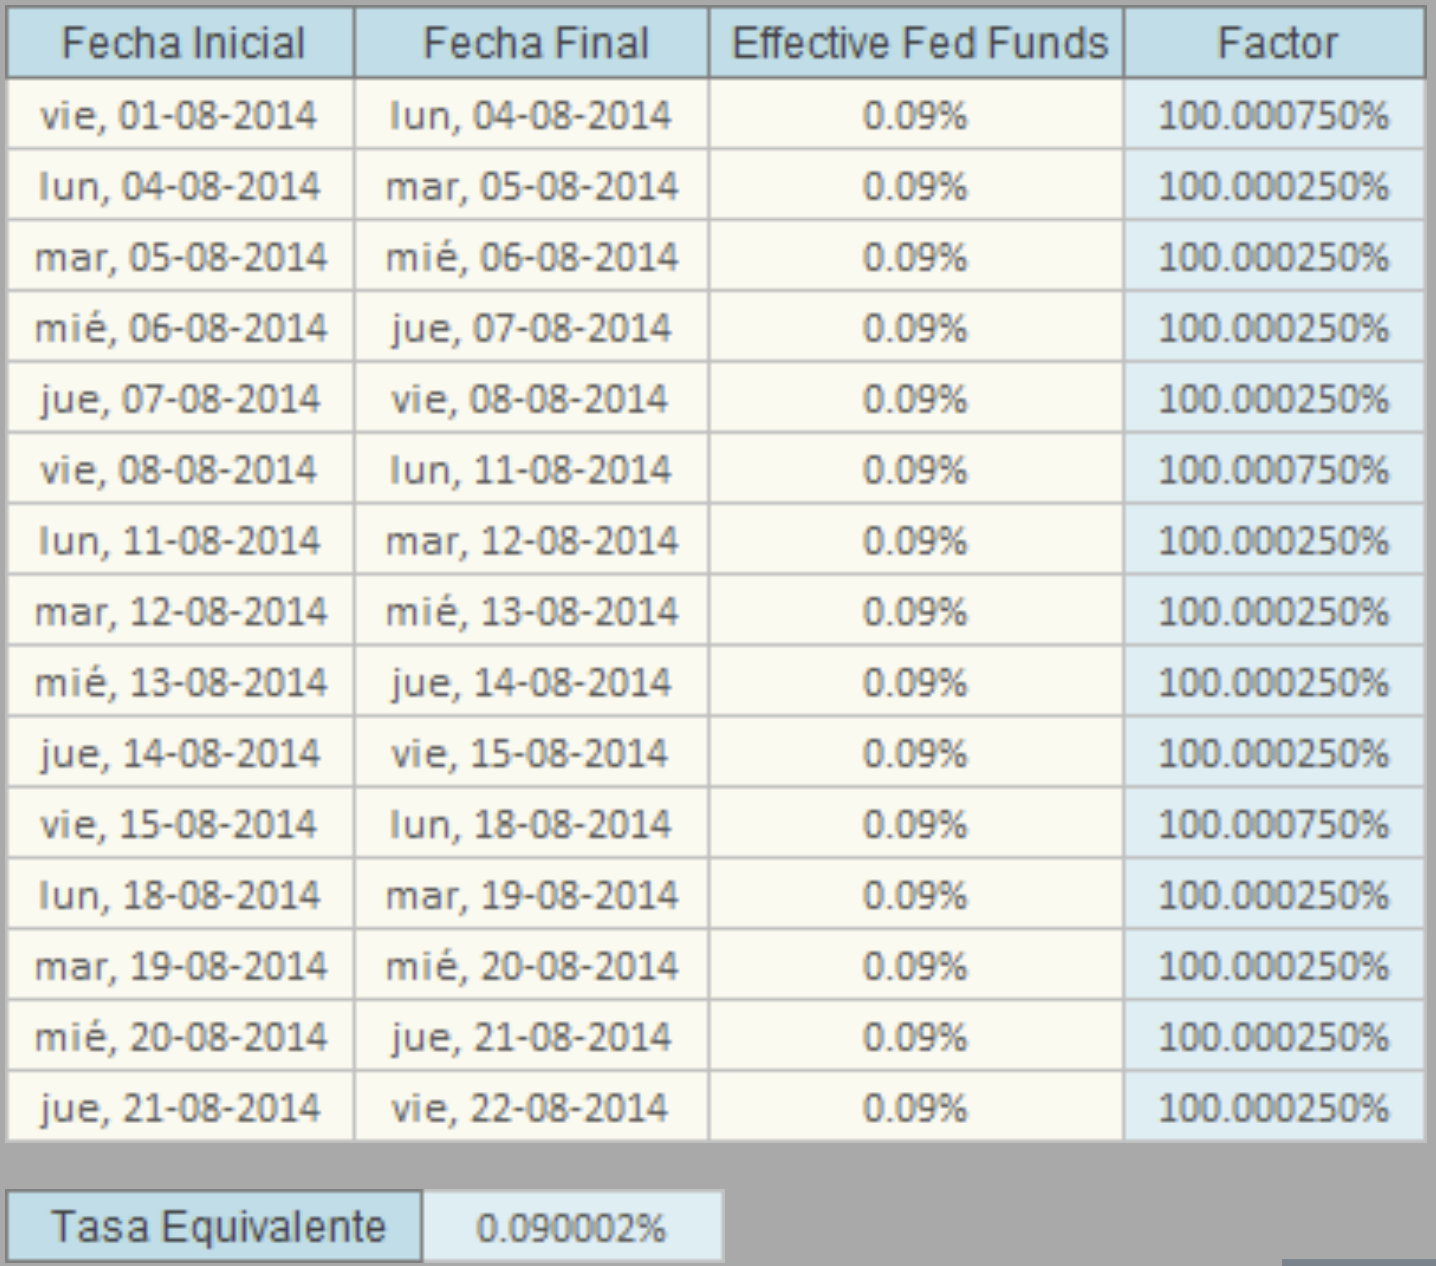

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "./assets/"
Image(filename = PATH + "tabla_presentacion_clase_1.png", width=500, height=500)

In [3]:
fecha_inicial = Qcf.QCDate(1, 8, 2014)

In [4]:
type(fecha_inicial)

finrisk.QC_Financial_3.QCDate

In [5]:
print(fecha_inicial.description(False))

2014-08-01


In [6]:
fecha_2 = fecha_inicial.add_days(1)
fecha_2.description(False)

'2014-08-02'

In [7]:
fecha_2.week_day()

finrisk.QC_Financial_3.WeekDay.SAT

In [8]:
scl = Qcf.BusinessCalendar(fecha_inicial, 2) # 2 es el largo en años del calendario
# Por default se consideran como feriados los días sábado y domingo.

In [9]:
# Para agregar un feriado distinto:
sept19 = Qcf.QCDate(19, 9, 2019)
scl.add_holiday(sept19)

In [10]:
scl.next_busy_day(fecha_inicial).description(False)

'2014-08-01'

In [11]:
scl.next_busy_day(sept19).description(False)

'2019-09-20'

La siguiente función permite construir una fila de la tabla.

In [12]:
def make_period(fecha: Qcf.QCDate, tasa: float, calendario: Qcf.BusinessCalendar):
    fecha_2 = calendario.next_busy_day(fecha.add_days(1))
    factor = 1 + fecha.day_diff(fecha_2) * tasa / 360
    return fecha, fecha_2, tasa, factor

In [13]:
make_period(fecha_inicial, .0009, scl)

(<finrisk.QC_Financial_3.QCDate at 0x122578130>,
 0.0009,
 1.0000075)

Con este loop se construye la tabla:

In [14]:
fecha_final = Qcf.QCDate(21, 8, 2014)
datos = []
fecha = fecha_inicial
tasa = .0009
while fecha <= fecha_final:
    datos.append(make_period(fecha, tasa, scl))
    fecha = scl.next_busy_day(fecha.add_days(1))

Se visualiza el resultado:

In [15]:
for dato in datos:
    print(dato[0].description(False), dato[1].description(False), dato[2], dato[3])

2014-08-01 2014-08-04 0.0009 1.0000075
2014-08-04 2014-08-05 0.0009 1.0000025
2014-08-05 2014-08-06 0.0009 1.0000025
2014-08-06 2014-08-07 0.0009 1.0000025
2014-08-07 2014-08-08 0.0009 1.0000025
2014-08-08 2014-08-11 0.0009 1.0000075
2014-08-11 2014-08-12 0.0009 1.0000025
2014-08-12 2014-08-13 0.0009 1.0000025
2014-08-13 2014-08-14 0.0009 1.0000025
2014-08-14 2014-08-15 0.0009 1.0000025
2014-08-15 2014-08-18 0.0009 1.0000075
2014-08-18 2014-08-19 0.0009 1.0000025
2014-08-19 2014-08-20 0.0009 1.0000025
2014-08-20 2014-08-21 0.0009 1.0000025
2014-08-21 2014-08-22 0.0009 1.0000025


Se construye un `pandas.DataFrame` para visualizar.

In [16]:
import pandas as pd

In [17]:
tabla = pd.DataFrame(datos, columns=['fecha_inicial', 'fecha_final', 'tasa', 'factor'])

In [18]:
tabla

,fecha_inicial,fecha_final,tasa,factor
0,1-8-2014,4-8-2014,0.0009,1.000007
1,4-8-2014,5-8-2014,0.0009,1.000002
2,5-8-2014,6-8-2014,0.0009,1.000002
3,6-8-2014,7-8-2014,0.0009,1.000002
4,7-8-2014,8-8-2014,0.0009,1.000002
5,8-8-2014,11-8-2014,0.0009,1.000007
6,11-8-2014,12-8-2014,0.0009,1.000002
7,12-8-2014,13-8-2014,0.0009,1.000002
8,13-8-2014,14-8-2014,0.0009,1.000002
9,14-8-2014,15-8-2014,0.0009,1.000002


El resultado se puede exportar a csv o Excel.

In [19]:
tabla.to_csv("tabla.csv")

In [20]:
tabla.to_excel("tabla.xlsx")